In [7]:
from qiskit import *

In [8]:
qr = QuantumRegister(2)

In [9]:
# take measurement of quantum registers
cr = ClassicalRegister(2)

In [10]:
# build a cirucit using the above two
circuit = QuantumCircuit(qr, cr)

In [11]:
%matplotlib inline

In [12]:
circuit.draw()

In [13]:
# hadamard gate
circuit.h(qr[0])

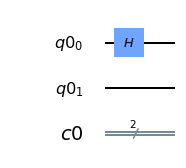

In [14]:
circuit.draw(output='mpl')

In [15]:
circuit.cx(qr[0], qr[1])

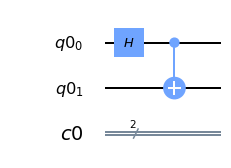

In [16]:
circuit.draw(output='mpl')

In [17]:
circuit.measure(qr, cr)

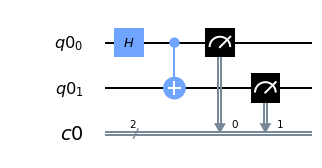

In [18]:
circuit.draw(output='mpl')

In [19]:
# using Aer component to simulate
simulator = Aer.get_backend('qasm_simulator')

In [20]:
result = execute(circuit, backend = simulator).result()

In [21]:
from qiskit.tools.visualization import plot_histogram

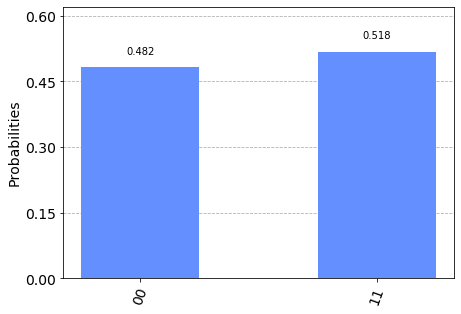

In [22]:
plot_histogram(result.get_counts(circuit))

In [23]:
from qiskit import IBMQ
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [24]:
# choose the device to run on 
provider = IBMQ.get_provider('ibm-q')

In [25]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [26]:
job = execute(circuit, backend=qcomp)

In [27]:
from qiskit.tools.monitor import job_monitor

In [30]:
# depending on how busy the device is, maybe a few minutes
# if run successfuly, the mesg is `Job Status: job has successfully run`
# othervise, the job is queued
job_monitor(job)

Job Status: job has successfully run


In [31]:
result = job.result()

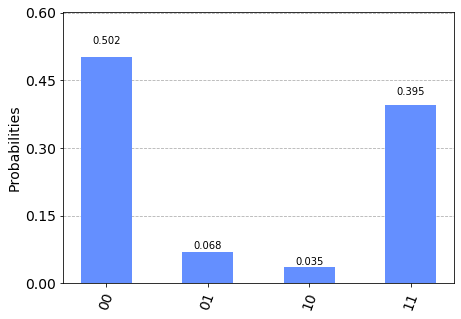

In [32]:
# when the circuit is running on the real quantum device, we also have little probability in `01` and `10` state
# but the majority is still in `00` and `11` state
plot_histogram(result.get_counts(circuit))

In [ ]:
# simulater simulate a perfect quantum device
# in the mean time, the real quantum device suspectedfully has quantum errors